In [15]:
import pandas as pd
import math
import numpy as np

df = pd.read_csv('wrime.csv')
df_prime = pd.read_csv('wrime.csv')

for index, column in enumerate(df.columns):
    if index > 3:
        df_prime[(column)] = round(df[(column)] / 3)
        # df_prime[(column)] = np.ceil(df[(column)] / 3)
# df_prime

In [16]:
csvname = 'wrime_zero-one.csv'
# csvname = 'wrime_zero-one_all.csv'
df_prime.to_csv(csvname)

In [17]:
import json
import time
import pickle
import itertools
from tqdm import tqdm
import csv

In [18]:
picklename = 'wrime_zero-one_avg.pickle'
# picklename = 'wrime_zero-one_avg_all.pickle'

In [19]:
chunk_size = 100
with open(csvname, 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    dataset = list(csv_reader)
alldata = []

In [148]:
# Writer
with tqdm(total=len(dataset[1:])) as pbar:
    for batch in itertools.zip_longest(*[iter(dataset[1:])]*chunk_size):
        batch = [b for b in batch if b is not None]

        for line in batch:
            data = {'id': int(line[0]),
                    'sentence': str(line[1]),
                    'label': list(map(float, line[5:13]))  # Writer Data
                   }
            alldata.append(data)
    
    pbar.update(len(batch))
    time.sleep(1)

pickle.dump(alldata, open(picklename, 'wb'))
# alldata

KeyError: "Invalid key: slice(1, None, None). Please first select a split. For example: `my_dataset_dictionary['train'][slice(1, None, None)]`. Available splits: ['test', 'train', 'validation']"

In [20]:
# Average
with tqdm(total=len(dataset[1:])) as pbar:
    for batch in itertools.zip_longest(*[iter(dataset[1:])]*chunk_size):
        batch = [b for b in batch if b is not None]

        for line in batch:
            data = {'id': int(line[0]),
                    'sentence': str(line[1]),
                    'label': list(map(float, line[-8:]))  # Avg.Reader Data
                   }
            alldata.append(data)
    
    pbar.update(len(batch))
    time.sleep(1)

pickle.dump(alldata, open(picklename, 'wb'))
# alldata

  0%|                                       | 100/43200 [00:01<08:29, 84.63it/s]


In [21]:
import pandas as pd
df = pd.DataFrame.from_dict(pd.read_pickle(picklename))
df.head()

,id,sentence,label
0,0,ぼけっとしてたらこんな時間｡チャリあるから食べにでたいのに…,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
1,1,今日の月も白くて明るい。昨日より雲が少なくてキレイな? と立ち止まる帰り道｡チャリなし生活も...,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]"
2,2,早寝するつもりが飲み物がなくなりコンビニへ｡ん､今日、風が涼しいな。,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
3,3,眠い、眠れない。,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
4,4,ただいま? って新体操してるやん!外食する気満々で家に何もないのに!テレビから離れられない…!,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"


In [22]:
# separate labels
LABEL_COLUMNS = ['joy','sadness', 'anticipation', 'surprise', 'anger', 'fear', 'disgust', 'trust']

df[LABEL_COLUMNS] = pd.DataFrame(df.label.tolist(), index= df.index)
df.head()

,id,sentence,label,joy,sadness,anticipation,surprise,anger,fear,disgust,trust
0,0,ぼけっとしてたらこんな時間｡チャリあるから食べにでたいのに…,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,今日の月も白くて明るい。昨日より雲が少なくてキレイな? と立ち止まる帰り道｡チャリなし生活も...,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,早寝するつもりが飲み物がなくなりコンビニへ｡ん､今日、風が涼しいな。,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,眠い、眠れない。,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,ただいま? って新体操してるやん!外食する気満々で家に何もないのに!テレビから離れられない…!,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
df[LABEL_COLUMNS].sum()

joy             5635.0
sadness         3584.0
anticipation    4868.0
surprise        2717.0
anger            543.0
fear            2128.0
disgust         1849.0
trust            185.0
dtype: float64

In [24]:
# 1-3: 69176.0
# 2-3: 21509.0
np.sum(df[LABEL_COLUMNS].sum())

21509.0

<AxesSubplot:>

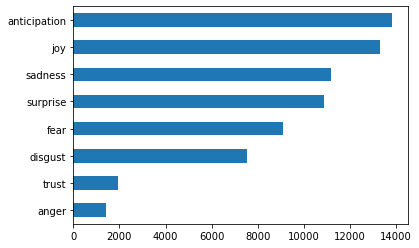

In [13]:
df[LABEL_COLUMNS].sum().sort_values().plot(kind="barh")

In [142]:
# データセットの分割
from sklearn.model_selection import train_test_split

train_df, val_test_df = train_test_split(df, train_size=0.8, random_state=32)
val_df, test_df = train_test_split(val_test_df, train_size=0.5, random_state=32)
train_df, val_df, test_df = train_df.reset_index(drop=True), val_df.reset_index(drop=True), test_df.reset_index(drop=True)

print("FULL Dataset: {}".format(len(df)))
print("TRAIN Dataset: {}".format(len(train_df)))
print("TEST Dataset: {}".format(len(test_df)))
print("VALIDATION Dataset: {}".format(len(val_df)))


FULL Dataset: 43200
TRAIN Dataset: 34560
TEST Dataset: 4320
VALIDATION Dataset: 4320


In [143]:
from datasets import Dataset, DatasetDict
columns = ["sentence", "label"]
dataset = DatasetDict({
    "train": Dataset.from_pandas(train_df[columns]),
    "test": Dataset.from_pandas(test_df[columns]),
    "validation": Dataset.from_pandas(val_df[columns])
})

In [146]:
dataset["train"][:5]

{'sentence': ['あ、予約できたわ',
  '【試作品発表のタイミング】\\n\\nα版（試作品）は、早く世の中に出して、使ってもらいながら意見を聞くのは良いかも。基本、無料で出すのが望ましいかも。\\n\\nただ、無料だからといって、ユーザーの時間を奪うものであってはならない。\\n批判をしっかりフィードバックして、β版を出したいところ。',
  '紺色の布の裁断は終わったけど、白い布はテンションが上がらぬので、広げたまま放置なう！やる気とテンション、来い＼(^o^)／',
  'えまー！！えまー！！ ねむーい！！あと14ふん！！',
  '面接終わってあの時ああ言えばよかったって1人反省会になるんだけどもうその時間には戻れないから考えるのやめなきゃ'],
 'label': [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]]}

In [144]:
import transformers
import torch

MAX_TOKEN_COUNT = 128 # 最大トークン数
TRAIN_BATCH_SIZE = 32 # train時のbatch数
VALID_BATCH_SIZE = 32 # validation時のbatch数
EPOCHS = 5
LEARNING_RATE = 1e-05

MODEL_CHECKPOINT = "cl-tohoku/bert-base-japanese-v2"

Neither PyTorch nor TensorFlow >= 2.0 have been found.Models won't be available and only tokenizers, configurationand file/data utilities can be used.


ModuleNotFoundError: No module named 'torch'

In [175]:
from sklearn.metrics import accuracy_score
import numpy as np

In [183]:
accuracy_score(np.array([[0, 1], [0, 1]]), np.array([[1, 1], [0, 1]]))

0.5

In [184]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
sigmoid_v = np.vectorize(sigmoid)

In [193]:
sigmoid_v(np.array([[-1, 0, 0.5, 1], [-1, 1, 0.5, 0]]))

array([[0.26894142, 0.5       , 0.62245933, 0.73105858],
       [0.26894142, 0.73105858, 0.62245933, 0.5       ]])

In [194]:
sigmoid(np.array([[-1, 0, 0.5, 1], [-1, 1, 0.5, 0]]))

array([[0.26894142, 0.5       , 0.62245933, 0.73105858],
       [0.26894142, 0.73105858, 0.62245933, 0.5       ]])